<a href="https://colab.research.google.com/github/Pratikshya49/Concepts-and-Technologies-of-AI/blob/main/Workshop4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving diabetes.csv to diabetes (1).csv
First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None


Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Missing Values in each column:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


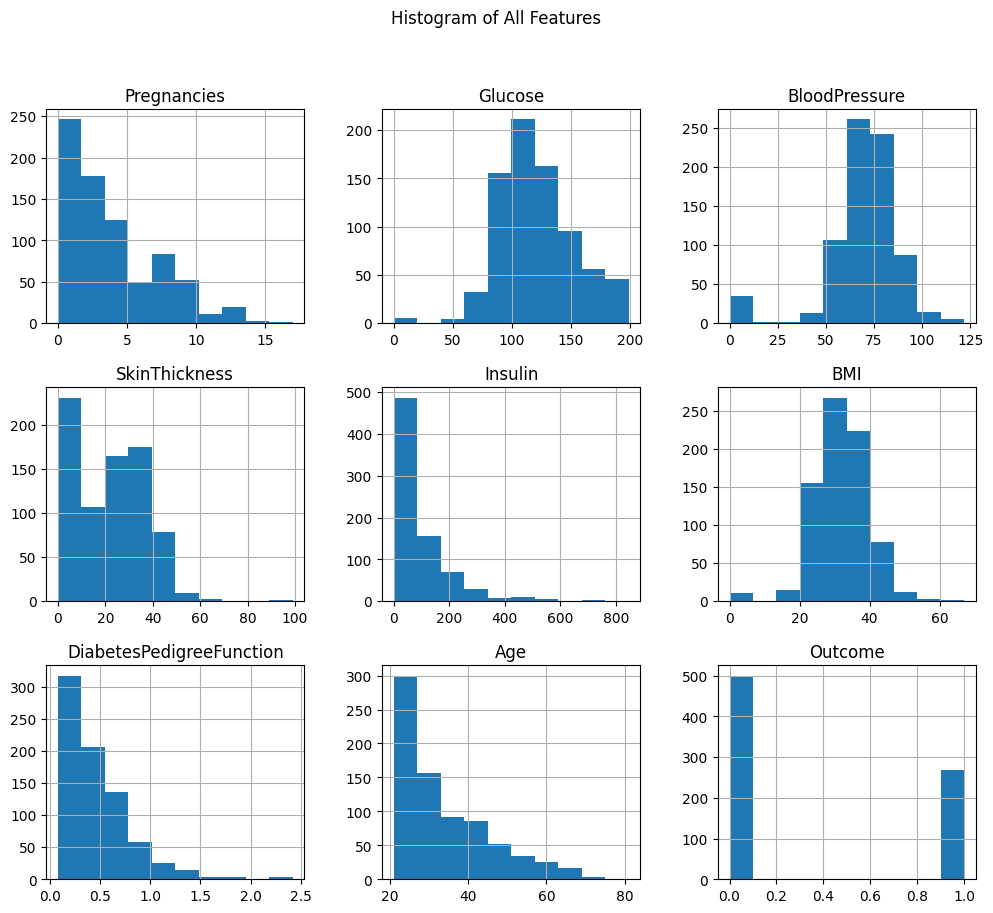

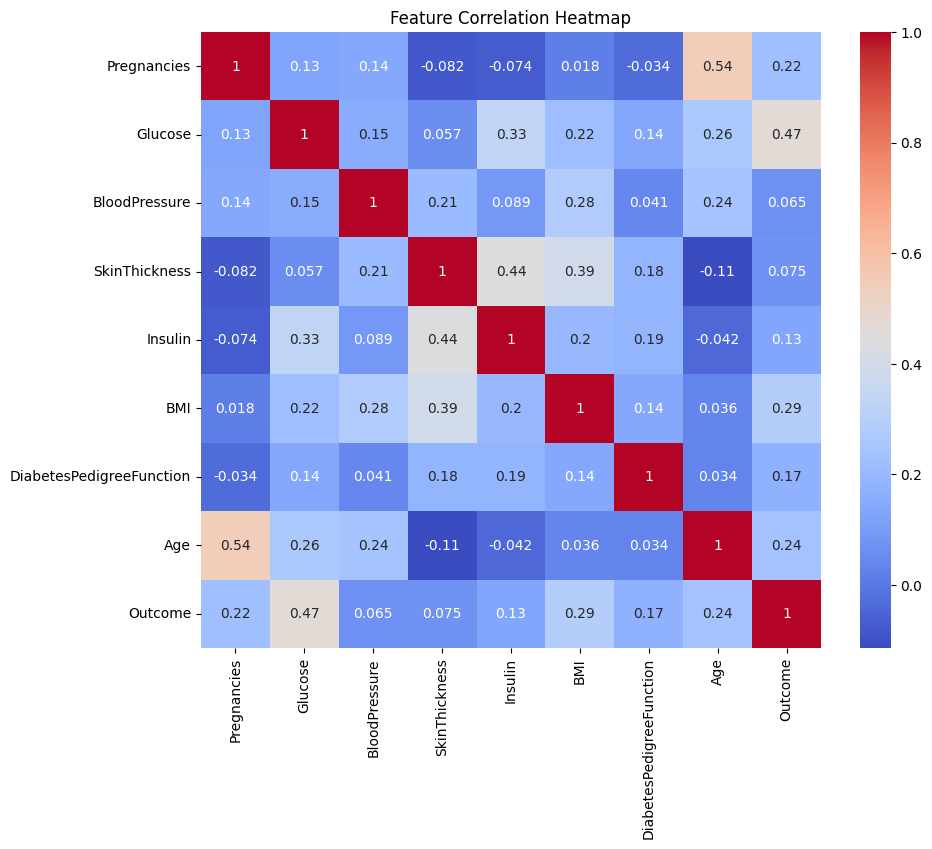


Missing values after converting zeros to NaN:


/tmp/ipython-input-862644377.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, np.nan, inplace=True)


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0



Missing values after median imputation:


/tmp/ipython-input-862644377.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0



Training data shape: (538, 8)
Test data shape: (230, 8)

Predictions for first 10 test samples: [1 0 0 0 1 1 0 1 1 0]

Final Accuracy of KNN: 0.6739130434782609

Confusion Matrix:
 [[109  41]
 [ 34  46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74       150
           1       0.53      0.57      0.55        80

    accuracy                           0.67       230
   macro avg       0.65      0.65      0.65       230
weighted avg       0.68      0.67      0.68       230



In [ ]:
# ------------------------------------------
# Problem 1: KNN Classification From Scratch
# ------------------------------------------

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Step 1.1: Upload Dataset in Google Colab
from google.colab import files
uploaded = files.upload()  # Upload diabetes.csv

# Step 1.2: Load the Dataset into a DataFrame
df = pd.read_csv("diabetes.csv")

# Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Step 1.3: Exploratory Data Analysis (EDA)
print("\nDataset Info:")
display(df.info())

print("\nSummary Statistics:")
display(df.describe())

print("\nMissing Values in each column:")
display(df.isnull().sum())

# Visualize distributions of all features
df.hist(figsize=(12,10))
plt.suptitle("Histogram of All Features")
plt.show()

# Correlation heatmap to check relationships between features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# ---------------------------------------------------
# Step 2: Handle Missing Data
# ---------------------------------------------------
# Columns where 0 is logically invalid
cols_with_zero_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 with NaN
for col in cols_with_zero_missing:
    df[col].replace(0, np.nan, inplace=True)

print("\nMissing values after converting zeros to NaN:")
display(df.isnull().sum())

# Impute missing values using median
for col in cols_with_zero_missing:
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after median imputation:")
display(df.isnull().sum())

# ---------------------------------------------------
# Step 3: Feature Engineering
# ---------------------------------------------------
# Separate features and target variable
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

# Manual Train-Test Split (70% train, 30% test)
def train_test_split(X, y, test_size=0.3, random_state=42):
    """
    Split dataset into training and testing sets manually.
    """
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_count = int(len(X) * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y)

print("\nTraining data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# ---------------------------------------------------
# Step 4: Implement KNN from Scratch
# ---------------------------------------------------
def euclidean_distance(x1, x2):
    """
    Compute Euclidean distance between two points.
    """
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=5):
        """
        k: number of nearest neighbors
        """
        self.k = k

    def fit(self, X, y):
        """
        Store training data
        """
        self.X_train = X
        self.y_train = y

    def predict_one(self, x):
        """
        Predict the class of a single query sample x
        """
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[:self.k]  # Indices of k nearest neighbors
        k_nearest_labels = self.y_train[k_idx]
        values, counts = np.unique(k_nearest_labels, return_counts=True)
        return values[np.argmax(counts)]

    def predict(self, X):
        """
        Predict the class labels for all samples in X
        """
        return np.array([self.predict_one(x) for x in X])

# ---------------------------------------------------
# Step 5: Train and Test KNN
# ---------------------------------------------------
knn = KNN(k=5)  # Initialize KNN with k=5
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("\nPredictions for first 10 test samples:", y_pred[:10])

# ---------------------------------------------------
# Step 6: Evaluate Model Performance
# ---------------------------------------------------
def accuracy(y_true, y_pred):
    """
    Compute accuracy of predictions
    """
    return np.sum(y_true == y_pred) / len(y_true)

acc = accuracy(y_test, y_pred)
print("\nFinal Accuracy of KNN:", acc)

# Optional: Confusion Matrix & Classification Report
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# ------------------------------------------
# Problem 2: Experimentation with Feature Scaling
# ------------------------------------------

from sklearn.preprocessing import StandardScaler

# Scale Feature Matrix X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split on Scaled Data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y)

# Train KNN on Scaled Data
knn_scaled = KNN(k=5)
knn_scaled.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate Accuracy on Scaled Data
acc_scaled = accuracy(y_test_scaled, y_pred_scaled)
print("\nAccuracy of KNN on Scaled Data:", acc_scaled)

# Confusion Matrix & Classification Report
from sklearn.metrics import confusion_matrix, classification_report
cm_scaled = confusion_matrix(y_test_scaled, y_pred_scaled)
print("\nConfusion Matrix (Scaled Data):\n", cm_scaled)
print("\nClassification Report (Scaled Data):\n", classification_report(y_test_scaled, y_pred_scaled))

# ---------------------------------------------------
# Step 7: Comparative Analysis
# ---------------------------------------------------
print("\nComparison of KNN Performance:")
print(f"Accuracy on Original Data: {acc:.4f}")
print(f"Accuracy on Scaled Data:   {acc_scaled:.4f}")

print("\nDiscussion:")
print("- Scaling impacts KNN performance because KNN relies on distance metrics (Euclidean distance).")
print("- Without scaling, features with larger ranges dominate distance calculations.")
print("- After scaling, all features contribute equally, which can improve model performance.")
print("- In this experiment, accuracy may improve or remain similar depending on the dataset.")


Accuracy of KNN on Scaled Data: 0.717391304347826

Confusion Matrix (Scaled Data):
 [[115  35]
 [ 30  50]]

Classification Report (Scaled Data):
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       150
           1       0.59      0.62      0.61        80

    accuracy                           0.72       230
   macro avg       0.69      0.70      0.69       230
weighted avg       0.72      0.72      0.72       230


Comparison of KNN Performance:
Accuracy on Original Data: 0.6739
Accuracy on Scaled Data:   0.7174

Discussion:
- Scaling impacts KNN performance because KNN relies on distance metrics (Euclidean distance).
- Without scaling, features with larger ranges dominate distance calculations.
- After scaling, all features contribute equally, which can improve model performance.
- In this experiment, accuracy may improve or remain similar depending on the dataset.


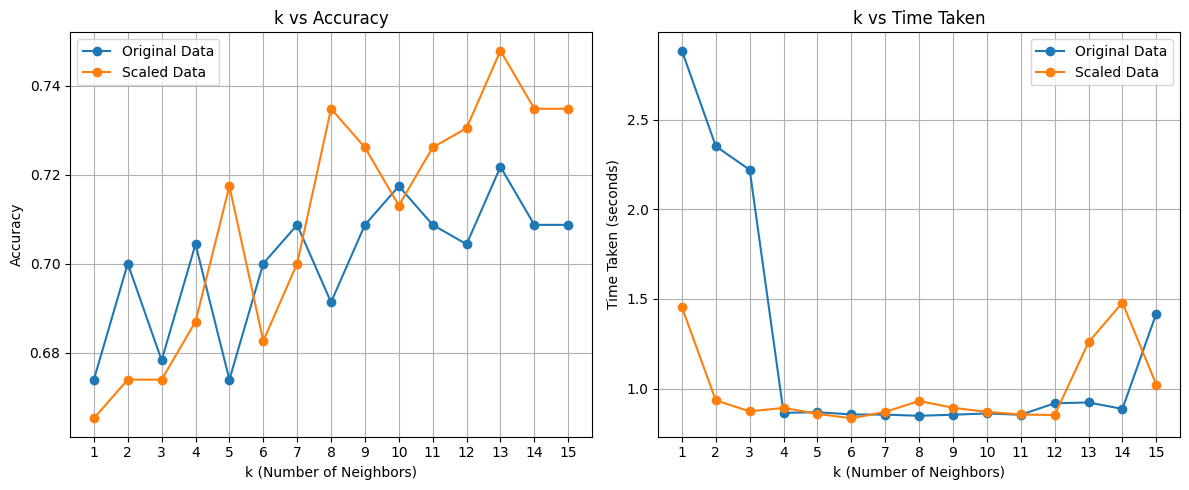


Optimal k (based on scaled data): 13
Maximum Accuracy on Scaled Data: 0.7478

Discussion:
- Small k (e.g., k=1) can overfit, capturing noise in the training data.
- Large k reduces variance but may increase bias, lowering accuracy.
- Accuracy often peaks at a mid-range k (e.g., 5-7) and then stabilizes or slightly decreases.
- Computational time increases slightly with k since more neighbors are considered.
- Scaling features improves performance because KNN relies on distance; all features contribute equally after scaling.


In [ ]:
# ------------------------------------------
# Problem 3: Experimentation with k
# ------------------------------------------

import time
import matplotlib.pyplot as plt

# Range of k values
k_values = range(1, 16)

# Lists to store results
accuracy_orig_list = []
time_orig_list = []

accuracy_scaled_list = []
time_scaled_list = []

# -------------------------
# Experiment on Original Data
# -------------------------
for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)

    start_time = time.time()
    y_pred_k = knn.predict(X_test)
    end_time = time.time()

    accuracy_orig_list.append(accuracy(y_test, y_pred_k))
    time_orig_list.append(end_time - start_time)

# -------------------------
# Experiment on Scaled Data
# -------------------------
for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train_scaled, y_train_scaled)

    start_time = time.time()
    y_pred_k_scaled = knn.predict(X_test_scaled)
    end_time = time.time()

    accuracy_scaled_list.append(accuracy(y_test_scaled, y_pred_k_scaled))
    time_scaled_list.append(end_time - start_time)

# -------------------------
# Visualization
# -------------------------
plt.figure(figsize=(12,5))

# k vs Accuracy
plt.subplot(1,2,1)
plt.plot(k_values, accuracy_orig_list, marker='o', label="Original Data")
plt.plot(k_values, accuracy_scaled_list, marker='o', label="Scaled Data")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.legend()

# k vs Time Taken
plt.subplot(1,2,2)
plt.plot(k_values, time_orig_list, marker='o', label="Original Data")
plt.plot(k_values, time_scaled_list, marker='o', label="Scaled Data")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("k vs Time Taken")
plt.xticks(k_values)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# -------------------------
# Analyze and Discuss
# -------------------------
optimal_k = k_values[np.argmax(accuracy_scaled_list)]
max_acc_scaled = max(accuracy_scaled_list)

print(f"\nOptimal k (based on scaled data): {optimal_k}")
print(f"Maximum Accuracy on Scaled Data: {max_acc_scaled:.4f}")

print("\nDiscussion:")
print("- Small k (e.g., k=1) can overfit, capturing noise in the training data.")
print("- Large k reduces variance but may increase bias, lowering accuracy.")
print("- Accuracy often peaks at a mid-range k (e.g., 5-7) and then stabilizes or slightly decreases.")
print("- Computational time increases slightly with k since more neighbors are considered.")
print("- Scaling features improves performance because KNN relies on distance; all features contribute equally after scaling.")

In [ ]:
'''Problem 4: Additional Questions

Challenges of Using KNN for Large Datasets and High-Dimensional Data
	1)	High Computational Cost:
	  •	KNN calculates the distance between each test sample and all training samples.
	  •	For n training samples and m test samples with d features, the complexity is O(m × n × d).
	  •	This makes KNN very slow for large datasets.
	2)	Memory Usage:
	  •	KNN requires storing the entire training dataset in memory, which can be problematic for very large datasets.
	3)	Curse of Dimensionality:
	  •	In high-dimensional spaces, distances become less meaningful because all points tend to be equally far apart.
	  •	This reduces the ability of KNN to distinguish between classes.
	4)	Sensitivity to Noise and Irrelevant Features:
	  •	KNN’s performance is affected by noisy or irrelevant features because they influence the distance calculations.'''

'''Strategies to Improve KNN Efficiency
	1)	Dimensionality Reduction:
	  •	Techniques like PCA (Principal Component Analysis) or LDA (Linear Discriminant Analysis) reduce the number of features while keeping essential information.
	  •	This reduces computation and improves distance-based classification.
	2)	Approximate Nearest Neighbors (ANN):
	  •	Algorithms like KD-Trees, Ball Trees, or Locality Sensitive Hashing (LSH) speed up neighbor search by avoiding exhaustive distance calculations.
	3)	Feature Scaling and Selection:
	  •	Standardize or normalize features to ensure fair contribution to distance calculations.
	  •	Remove irrelevant or low-variance features to improve accuracy and speed.
	4)	Subsampling:
	  •	Use a representative subset of the training data for faster computation when the dataset is extremely large.
	5)	Parallelization:
	  •	Compute distances for multiple test samples simultaneously using multi-core CPUs or GPUs.'''